Module 1 – Data Collection

This module:
- Loads the Fire Weather Index (FWI) dataset
- Cleans column names
- Maps region codes to region names (if required)
- Displays random samples
- Detects missing values
- Verifies data types and dataset structure

In [ ]:
# Import and load the CSV
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

file_path = "FWI Dataset.csv"   
df = pd.read_csv(file_path)


In [17]:
# Clean column names
df.columns = df.columns.str.strip()

In [ ]:
# Map Region 
region_mapping = {0: "Bejaia", 1: "Sidi-Bel Abbes"}

if df["Region"].dtype != "object":
    df["Region"] = df["Region"].map(region_mapping)

In [19]:
#Show random rows
print("Random rows from the dataset:\n")
print(df.sample(5))


Random rows from the dataset:

     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC     DC   ISI  \
191    9      8  2012           39  43  12   0.0  91.7  16.5   30.9   9.6   
82    22      8  2012           36  55  18   0.0  89.1  33.5  151.3   9.9   
149   28      6  2012           37  37  13   0.0  92.5  27.2   52.4  11.7   
39    10      7  2012           33  69  13   0.7  66.6   6.0    9.3   1.1   
4      5      6  2012           27  77  16   0.0  64.8   3.0   14.2   1.2   

      BUI   FWI      Classes          Region  
191  16.4  12.7      fire     Sidi-Bel Abbes  
82   43.1  20.4      fire             Bejaia  
149  27.1  18.4      fire     Sidi-Bel Abbes  
39    5.8   0.5  not fire             Bejaia  
4     3.9   0.5  not fire             Bejaia  


In [20]:
# Show rows with missing values
print("\nRows containing missing values:\n")
print(df[df.isnull().any(axis=1)])


Rows containing missing values:

     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC      DC   ISI  \
165   14      7  2012           37  37  18   0.2  88.9  12.9  14.6 9  12.5   

      BUI      FWI Classes          Region  
165  10.4  fire        NaN  Sidi-Bel Abbes  


In [24]:
# Convert DC and FWI to numeric
df["DC"] = pd.to_numeric(df["DC"], errors="coerce")
df["FWI"] = pd.to_numeric(df["FWI"], errors="coerce")

In [25]:
# Show DataFrame info
print("\nDataFrame Information:\n")
df.info()


DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.7+ KB


In [26]:
# Show missing value count
print("\nMissing Values in Each Column:\n")
print(df.isnull().sum())


Missing Values in Each Column:

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             1
ISI            0
BUI            0
FWI            1
Classes        1
Region         0
dtype: int64


Module 2 – Data Exploration & Data Preprocessing

Includes:
- Missing value treatment
- Outlier detection using boxplots and IQR
- Histograms and density plots
- Correlation matrix and heatmap
- Scatter plots and pair plots
- Region label encoding
- Removal of Classes
- Final dataset saving

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [28]:
#  LOAD DATASET

df = pd.read_csv("FWI Dataset.csv")
df.columns = df.columns.str.strip()

df["DC"] = pd.to_numeric(df["DC"], errors="coerce")
df["FWI"] = pd.to_numeric(df["FWI"], errors="coerce")

print("\nMissing Values BEFORE Handling:\n")
print(df.isnull().sum())



Missing Values BEFORE Handling:

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             1
ISI            0
BUI            0
FWI            1
Classes        1
Region         0
dtype: int64


In [ ]:
#  HANDLE MISSING VALUES

if "Classes" in df.columns:
    df["Classes"] = df["Classes"].fillna(method="ffill")

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

print("\nMissing Values AFTER Handling:\n")
print(df.isnull().sum())


Missing Values AFTER Handling:

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64



Outlier Detection Using Boxplots and IQR:

day: 0 outliers
month: 0 outliers
year: 0 outliers
Temperature: 2 outliers
RH: 0 outliers
Ws: 8 outliers
Rain: 35 outliers
FFMC: 16 outliers
DMC: 12 outliers
DC: 15 outliers
ISI: 4 outliers
BUI: 12 outliers
FWI: 4 outliers


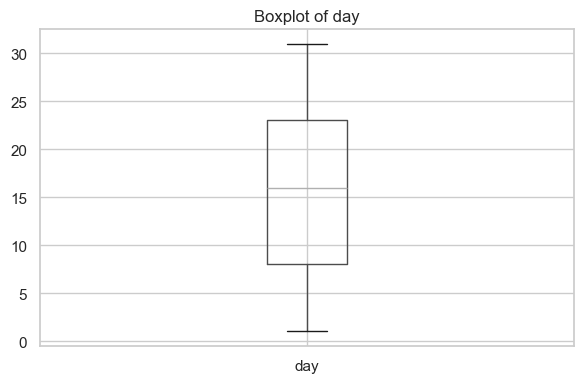

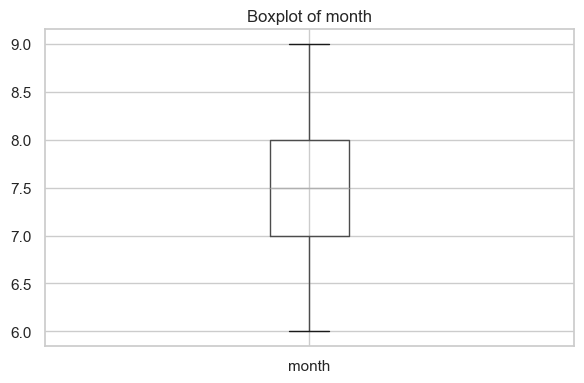

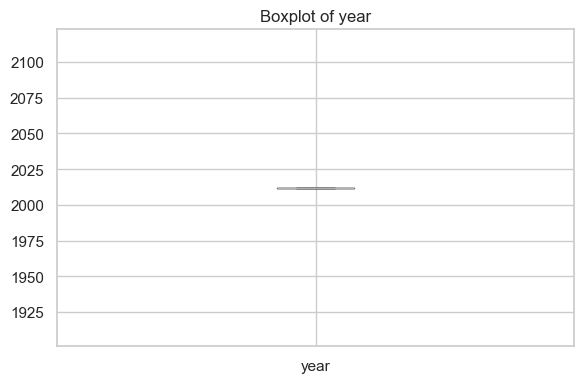

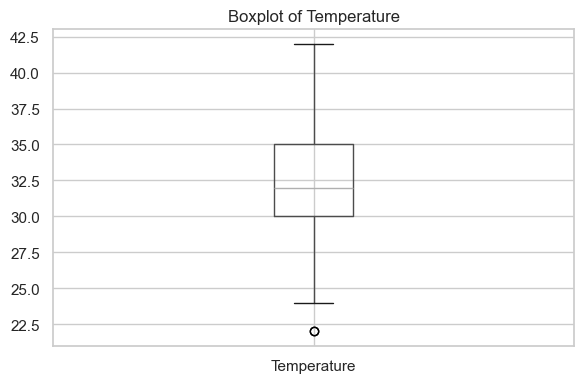

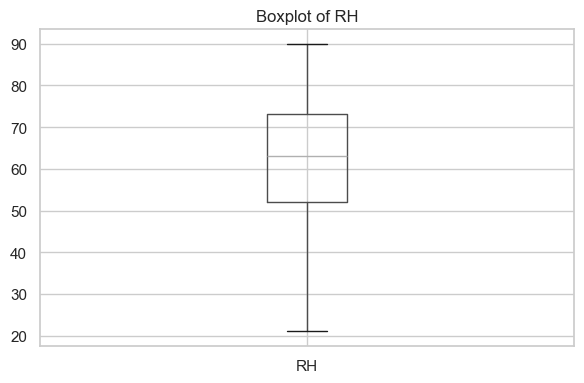

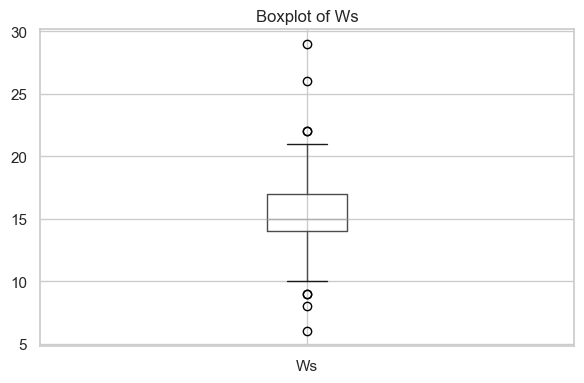

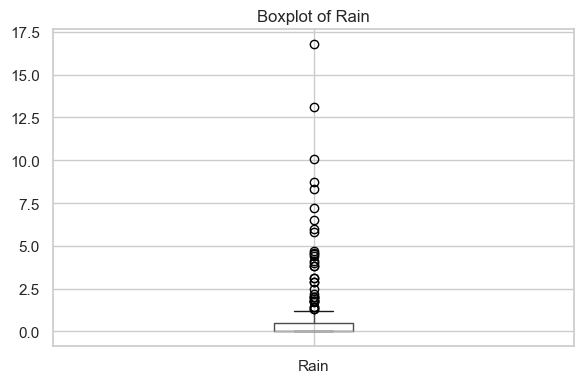

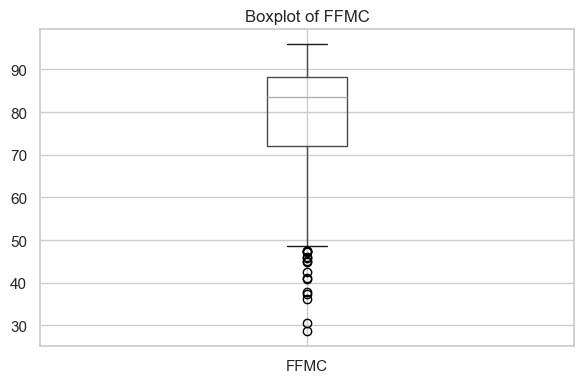

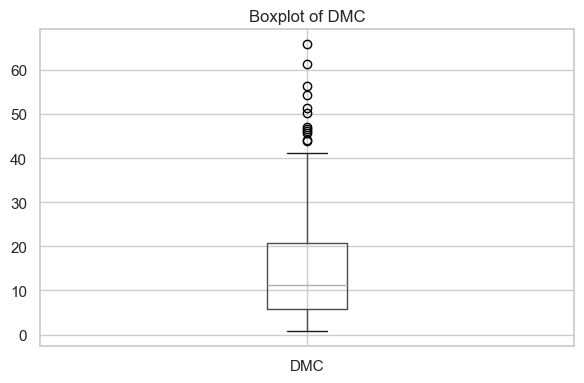

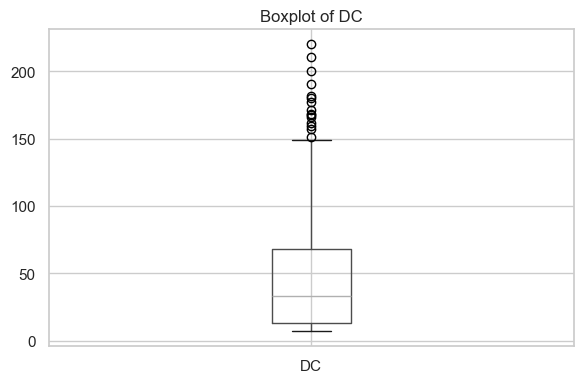

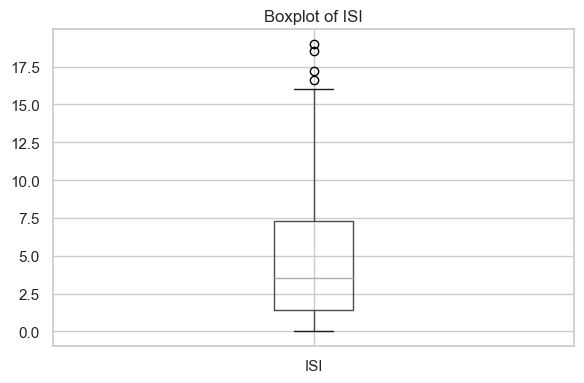

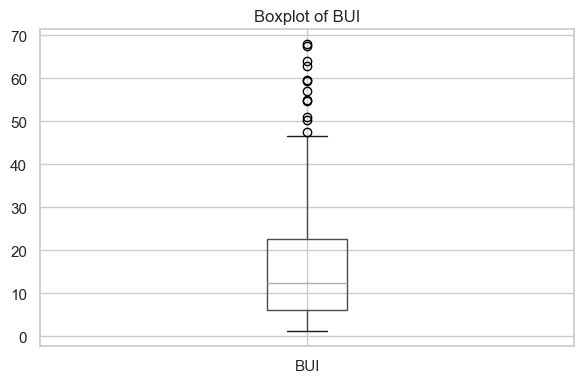

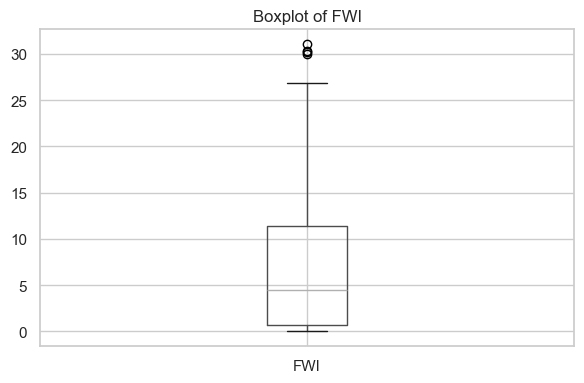

In [ ]:
#  OUTLIER DETECTION

print("\nOutlier Detection Using Boxplots and IQR:\n")

num_cols = df.select_dtypes(include=["int64", "float64"]).columns
outlier_counts = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    outlier_counts[col] = outliers.shape[0]

    print(f"{col}: {outliers.shape[0]} outliers")

    plt.figure(figsize=(6, 4))
    df.boxplot(column=[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

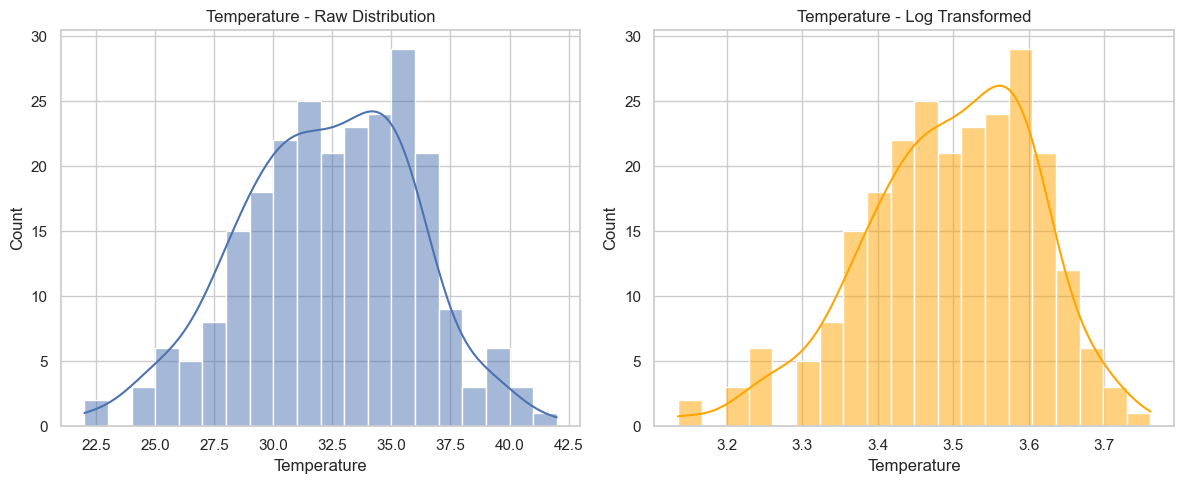

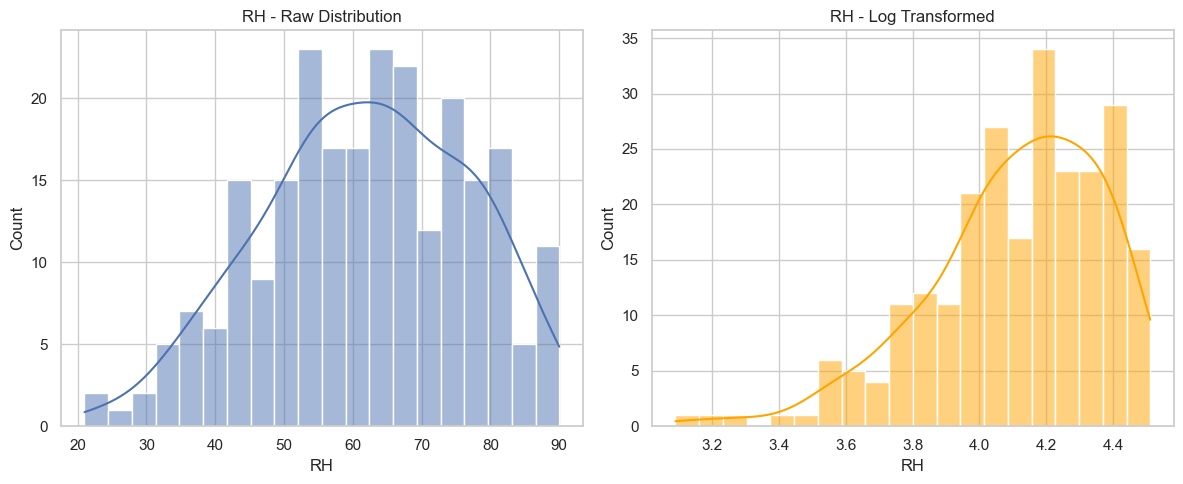

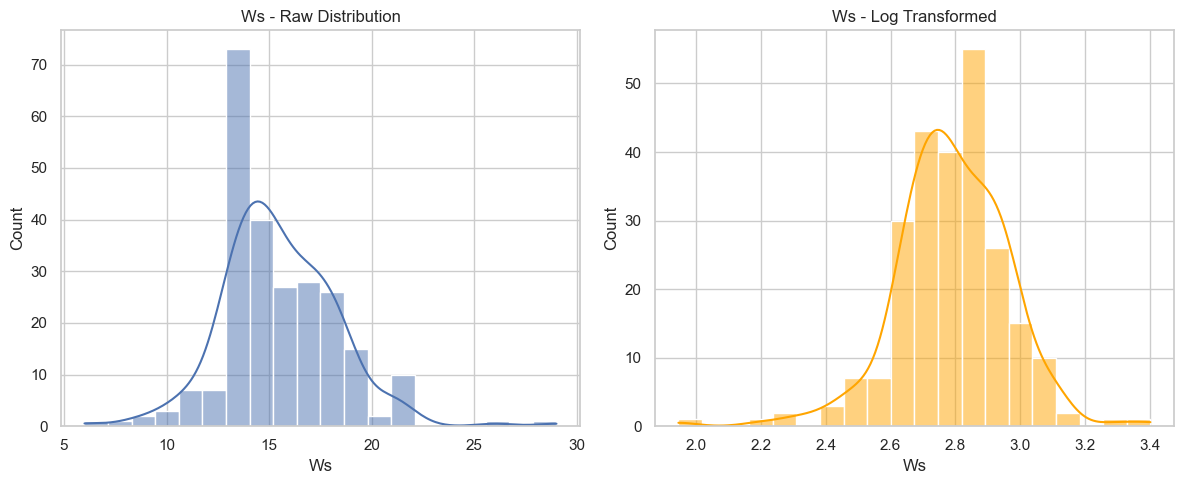

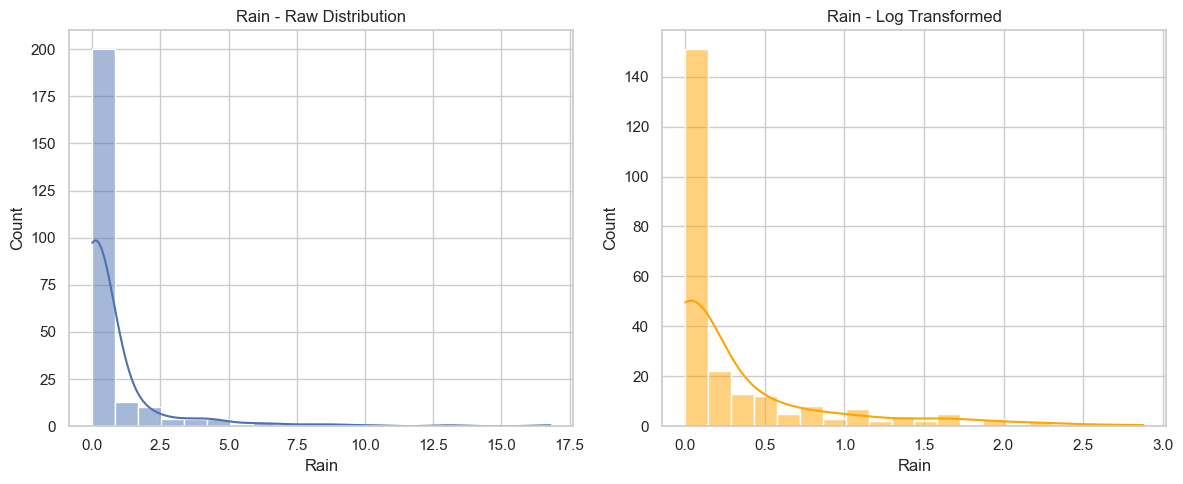

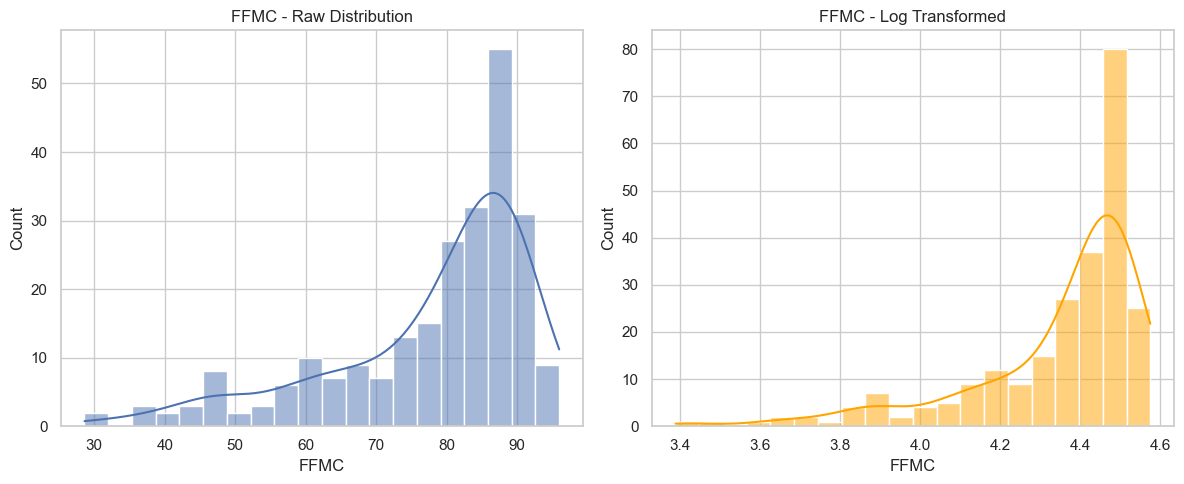

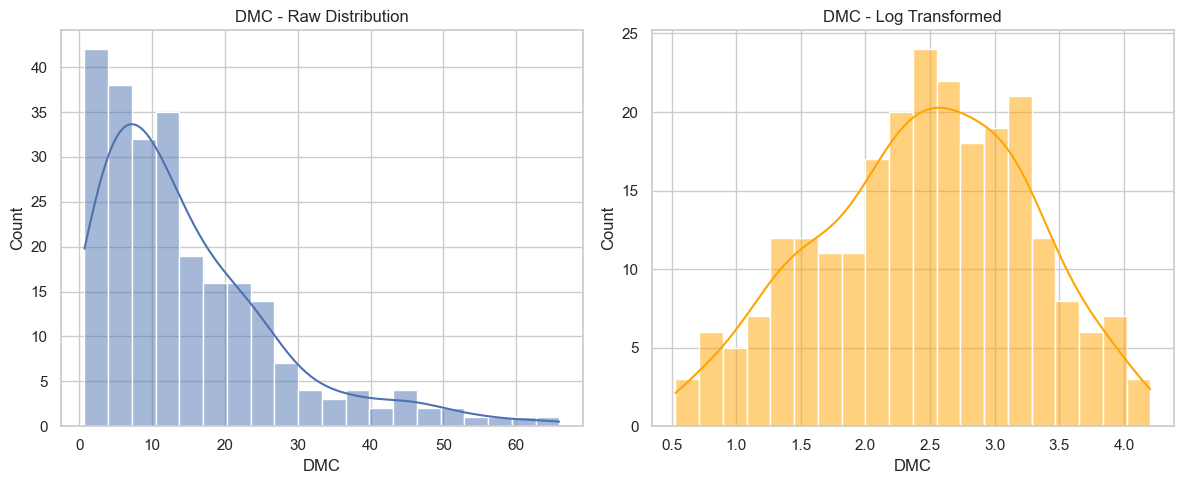

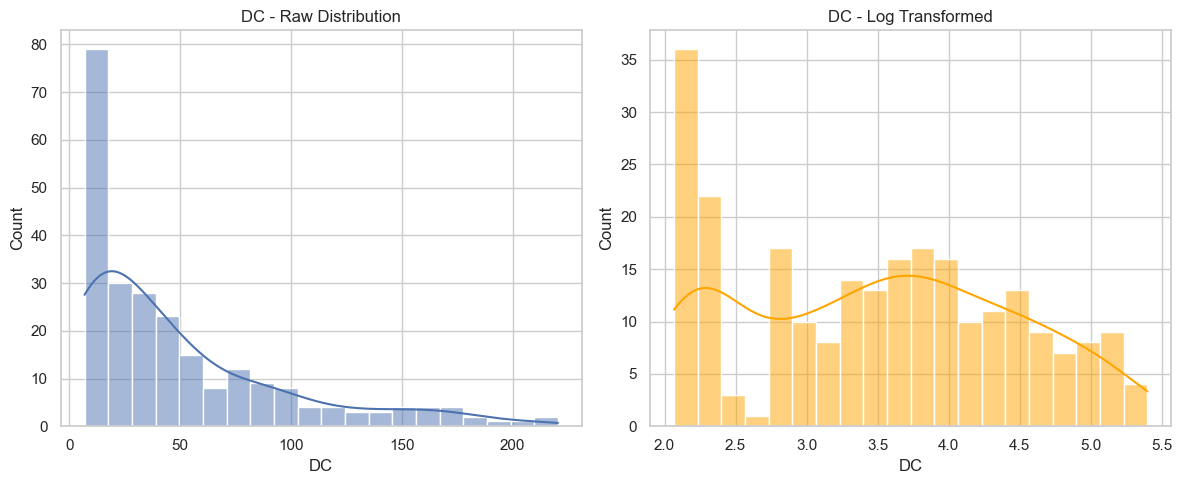

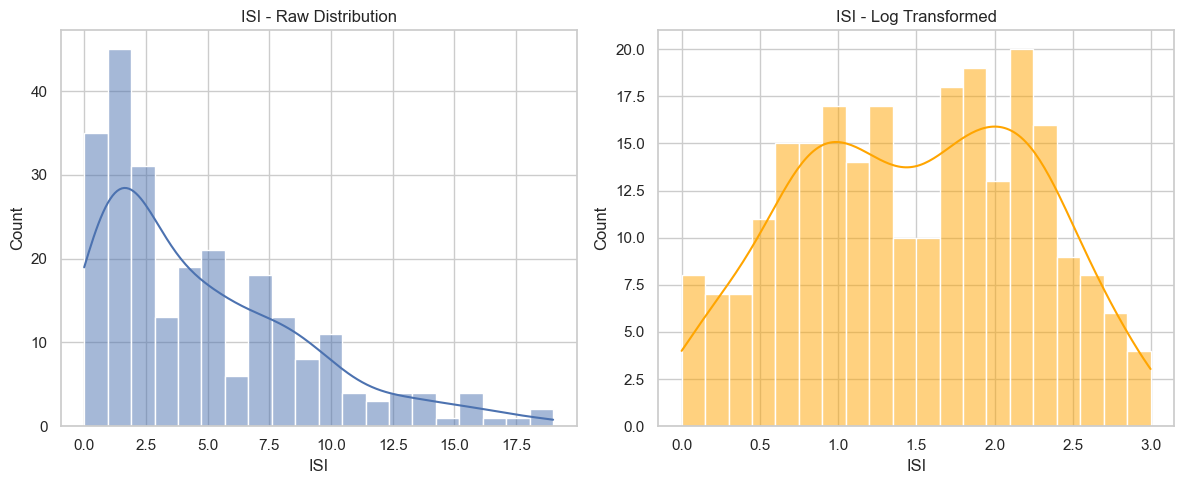

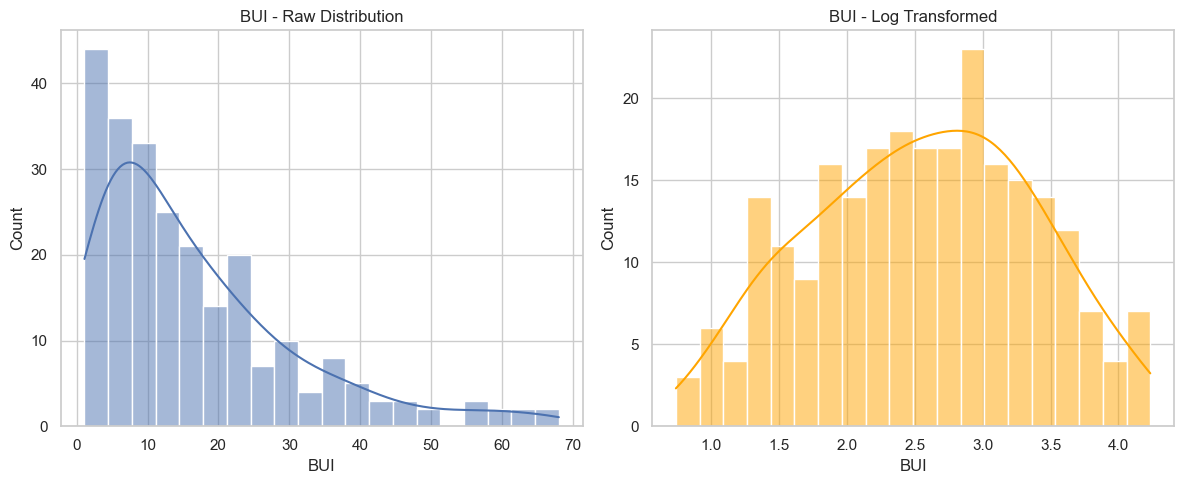

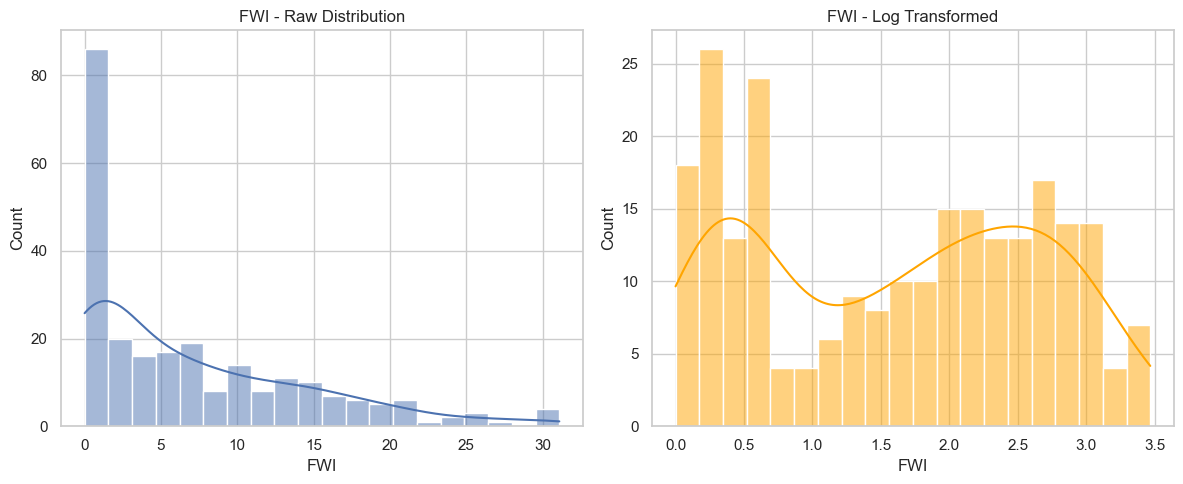

In [32]:
# HISTOGRAMS & DENSITY

cont_cols = ['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']

for col in cont_cols:
    data = df[col]

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.histplot(data, bins=20, kde=True)
    plt.title(f"{col} - Raw Distribution")

    if (data >= 0).all():
        plt.subplot(1,2,2)
        sns.histplot(np.log1p(data), bins=20, kde=True, color="orange")
        plt.title(f"{col} - Log Transformed")

    plt.tight_layout()


FWI Correlation Summary:

FWI            1.000000
ISI            0.916343
DMC            0.875827
BUI            0.857628
DC             0.739521
FFMC           0.690289
Temperature    0.564599
Ws             0.032315
Rain          -0.324369
RH            -0.577577
Name: FWI, dtype: float64


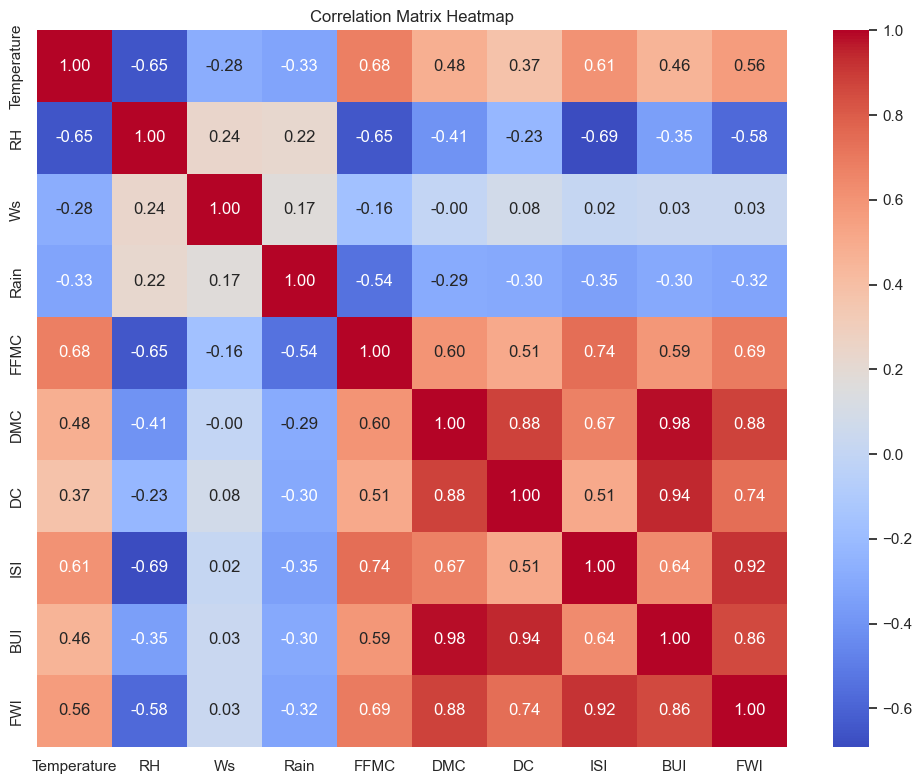

In [34]:
# CORRELATION MATRIX

corr = df[cont_cols].corr()

print("\nFWI Correlation Summary:\n")
print(corr["FWI"].sort_values(ascending=False))

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()

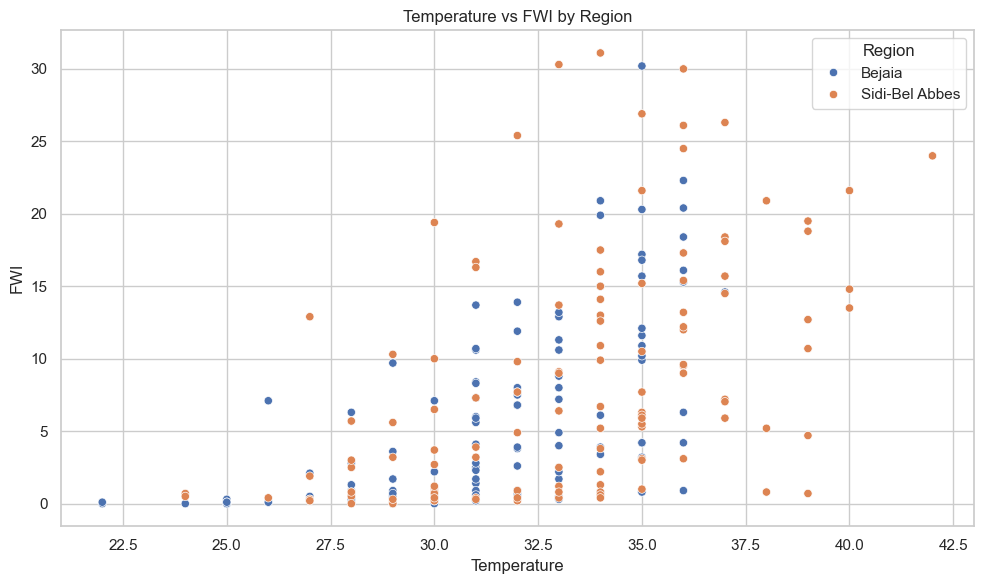

In [35]:

# SCATTER TEMP vs FWI

if "Region" in df.columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x="Temperature", y="FWI", hue="Region", data=df)
    plt.title("Temperature vs FWI by Region")
    plt.tight_layout()

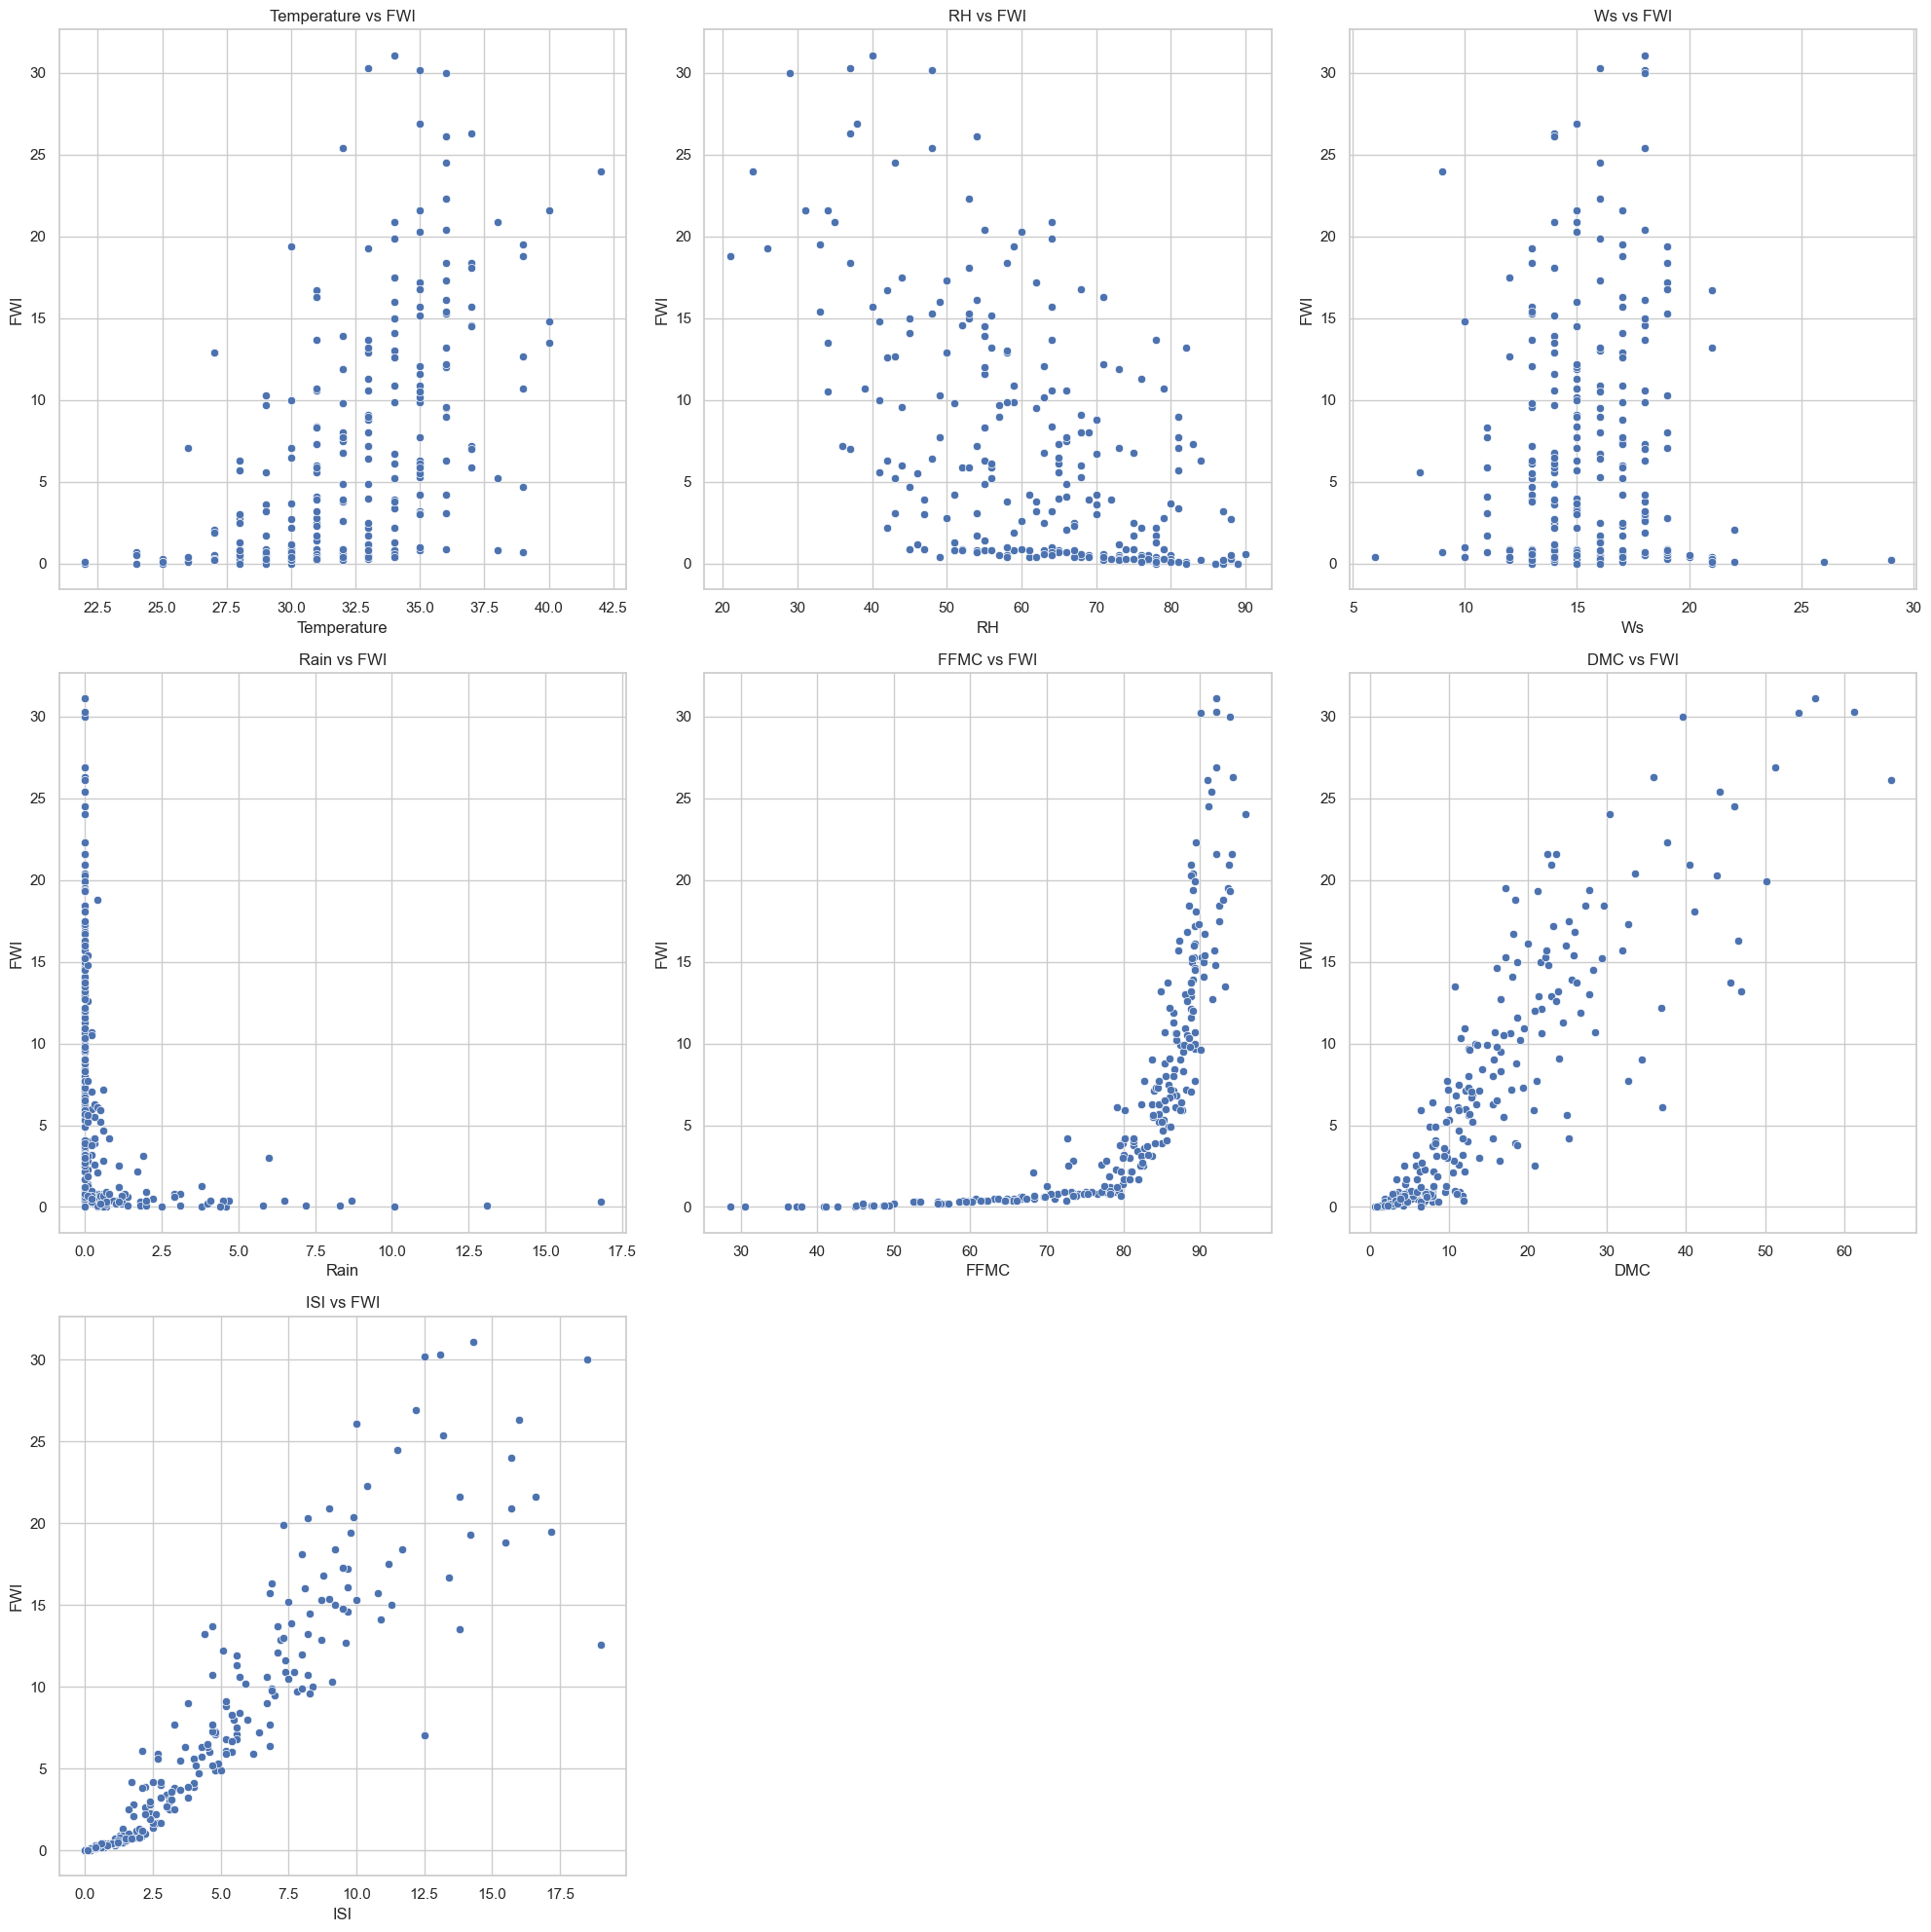

In [36]:
# YOUR EXACT SCATTER BLOCK

df.columns = df.columns.str.strip()

features_to_plot = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI']

plt.figure(figsize=(20, 20))

for i, feature in enumerate(features_to_plot, start=1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[feature], y=df['FWI'])
    plt.title(f"{feature} vs FWI")
    plt.xlabel(feature)
    plt.ylabel("FWI")

plt.tight_layout()

Text(0.5, 1.02, 'Pair Plot of Key Numeric Features')

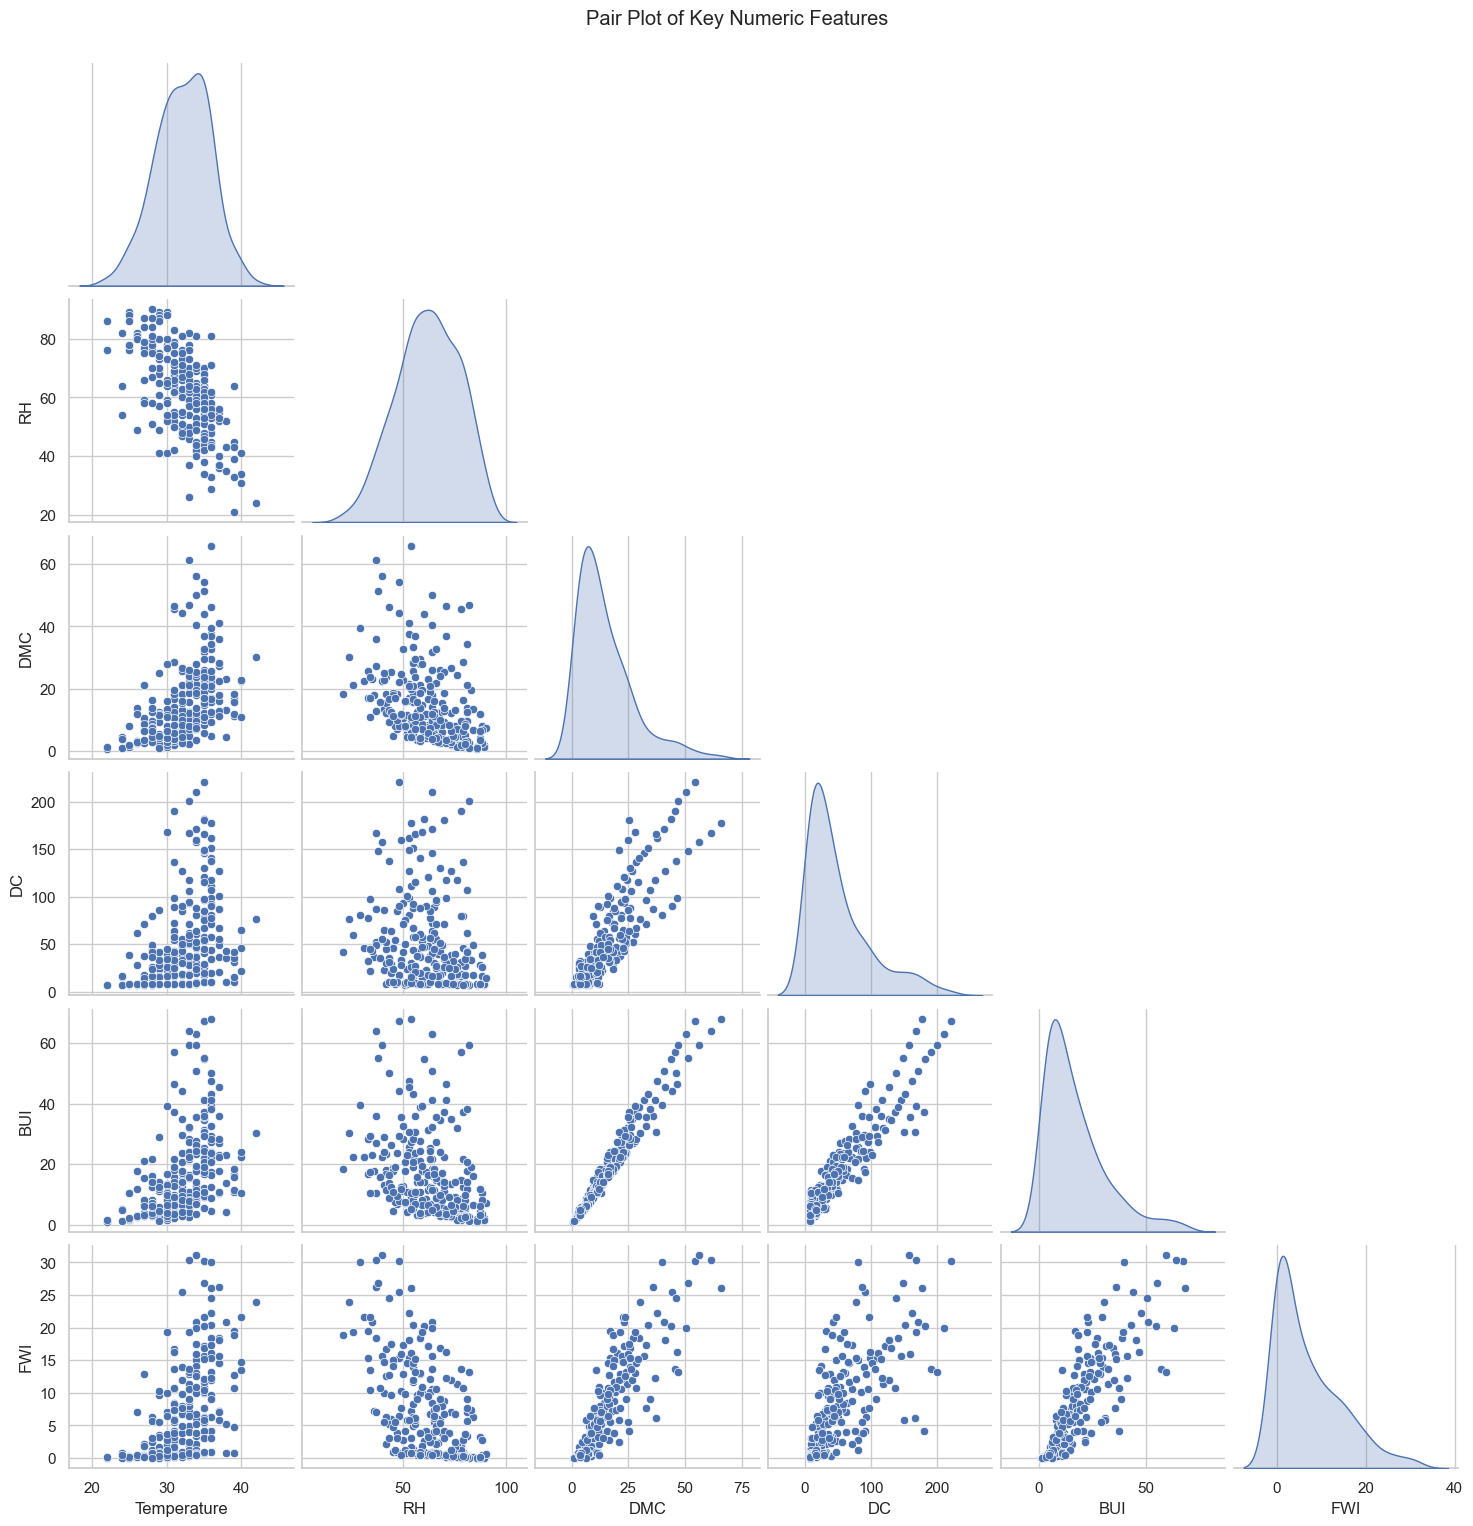

In [37]:
# 8. PAIR PLOT

pair_cols = ['Temperature','RH','DMC','DC','BUI','FWI']
pair_plot = sns.pairplot(df[pair_cols], diag_kind='kde', corner=True)
pair_plot.fig.suptitle("Pair Plot of Key Numeric Features", y=1.02)

In [38]:
# SAVE IMPORTANT PLOTS

plt.figure(figsize=(10,6))
sns.boxplot(data=df[['DC','FWI','BUI']])
plt.title("Boxplots of DC, FWI, BUI")
plt.savefig("boxplots_outliers.png", dpi=300)
plt.close()

plt.figure(figsize=(10,6))
df['FWI'].hist(bins=20)
plt.title("Histogram of FWI")
plt.savefig("histogram_fwi.png", dpi=300)
plt.close()

plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.png", dpi=300)
plt.close()

In [40]:
# LABEL ENCODING

df['Region'] = df['Region'].astype(str).str.strip().str.lower()
le_region = LabelEncoder()
df['Region_encoded'] = le_region.fit_transform(df['Region'])

In [41]:
# REMOVE CLASSES COMPLETELY

if "Classes" in df.columns:
    df.drop(columns=["Classes"], inplace=True)

if "Classes_encoded" in df.columns:
    df.drop(columns=["Classes_encoded"], inplace=True)


In [42]:
# FORCE FWI & DC AS INT64

df["FWI"] = df["FWI"].round().astype("int64")
df["DC"] = df["DC"].round().astype("int64")

print("\nData Types After Final Casting:\n")
print(df[['FWI','DC']].dtypes)



Data Types After Final Casting:

FWI    int64
DC     int64
dtype: object


In [44]:
 # SAVE FINAL CLEANED DATASET

df.to_csv("FWI_Dataset_Final.csv", index=False)

Module 3 – Feature Engineering & Scaling

-Computed correlation values between all features and the target variable FWI.

-Selected input features based on correlation strength (greater than 30%) while excluding day, month, year, and Region_encoded, and except Ws.

-Formed final feature set consisting of:
Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI

-Split dataset into feature matrix (X) and target variable (y).

-Applied StandardScaler to normalize numerical values for consistent scale.

-Converted scaled output to DataFrame to validate transformed distributions.

-Divided data into training and testing sets using train_test_split.

-Saved the scaler object as scaler.pkl for use during deployment and prediction.

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

In [4]:
df = pd.read_csv("../Dataset/FWI_Dataset_Final.csv")


In [12]:
# Compute correlation with FWI
corr_matrix = df.corr(numeric_only=True)
print("\nCorrelation Values with FWI:\n")
print(corr_matrix['FWI'].sort_values(ascending=False))


Correlation Values with FWI:

FWI               1.000000
ISI               0.919396
DMC               0.873823
BUI               0.855691
DC                0.737137
FFMC              0.696274
Temperature       0.568891
day               0.347711
Region_encoded    0.197913
month             0.086614
Ws                0.027030
Rain             -0.328662
RH               -0.581144
year                   NaN
Name: FWI, dtype: float64


In [14]:
# Selecting features based on > 30% correlation & rules:
# Keep Ws (manually kept)
selected_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']
target = 'FWI'
print("\nSelected Features for Model Training:\n", selected_features)


Selected Features for Model Training:
 ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']


In [15]:
# Split X & y
X = df[selected_features]
y = df[target]


In [16]:
# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Convert back to DataFrame for debugging
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

print("\nScaled Feature Summary:\n")
print(X_scaled_df.describe())


Scaled Feature Summary:

        Temperature            RH            Ws          Rain          FFMC  \
count  2.440000e+02  2.440000e+02  2.440000e+02  2.440000e+02  2.440000e+02   
mean   8.444975e-16 -1.747236e-16  1.892839e-16  1.456030e-17 -6.260930e-16   
std    1.002056e+00  1.002056e+00  1.002056e+00  1.002056e+00  1.002056e+00   
min   -2.805030e+00 -2.756122e+00 -3.388978e+00 -3.812229e-01 -3.444727e+00   
25%   -5.989790e-01 -6.690956e-01 -5.363325e-01 -3.812229e-01 -4.062510e-01   
50%   -4.746626e-02  7.146217e-02 -1.797518e-01 -3.812229e-01  3.922443e-01   
75%    7.798029e-01  7.615274e-01  5.334097e-01 -1.306346e-01  7.277172e-01   
max    2.710098e+00  1.889195e+00  4.812379e+00  8.038546e+00  1.265872e+00   

                DMC            DC           ISI           BUI  
count  2.440000e+02  2.440000e+02  2.440000e+02  2.440000e+02  
mean  -1.310427e-16  4.368091e-17 -2.184045e-16 -8.008166e-17  
std    1.002056e+00  1.002056e+00  1.002056e+00  1.002056e+00  
min   

In [18]:
# Save Scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("\nScaler saved successfully as scaler.pkl")



Scaler saved successfully as scaler.pkl


In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("\nTraining Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)



Training Shape: (195, 9)
Testing Shape: (49, 9)


Module 4 – Model Training using Ridge Regression and Comparisons

Includes:

-Used Ridge Regression as the primary regression model due to its effectiveness in reducing multicollinearity and stabilizing coefficients.

-Trained a total of five models for comparative analysis:

-Ridge Regression (primary)

-Linear Regression

-Lasso Regression

-Decision Tree Regressor

-Random Forest Regressor

-Applied mean imputation to handle any remaining null values before model training.

-Evaluated performance of all models using:

-Root Mean Squared Error (RMSE)

-R-Squared (R²) score

-Saved the Ridge model as ridge.pkl using pickle for deployment consistency.

-Compared model results to identify the best performer based on lowest RMSE and highest R² score.

-Ridge Regression achieved strong predictive performance and is selected as the deployed model.

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


In [22]:
# Impute missing values if any
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


results = {}

In [23]:
# Ridge Regression (primary model)
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
results["Ridge"] = (
    np.sqrt(mean_squared_error(y_test, ridge_pred)),
    r2_score(y_test, ridge_pred)
)
with open("ridge.pkl", "wb") as f:
    pickle.dump(ridge, f)
print("\nRidge Regression Saved as ridge.pkl")




Ridge Regression Saved as ridge.pkl


In [24]:
#  Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
results["Linear Regression"] = (
    np.sqrt(mean_squared_error(y_test, lr_pred)),
    r2_score(y_test, lr_pred)
)


In [25]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
results["Lasso"] = (
    np.sqrt(mean_squared_error(y_test, lasso_pred)),
    r2_score(y_test, lasso_pred)
)


In [26]:
#  Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
results["Decision Tree"] = (
    np.sqrt(mean_squared_error(y_test, dt_pred)),
    r2_score(y_test, dt_pred)
)

In [27]:
#  Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=120, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
results["Random Forest"] = (
    np.sqrt(mean_squared_error(y_test, rf_pred)),
    r2_score(y_test, rf_pred)
)


In [29]:
for model, (rmse, r2) in results.items():
    print(f"{model} → RMSE: {rmse:.4f}, R²: {r2:.4f}")

Ridge → RMSE: 0.6614, R²: 0.9889
Linear Regression → RMSE: 0.6501, R²: 0.9892
Lasso → RMSE: 0.7903, R²: 0.9841
Decision Tree → RMSE: 1.4128, R²: 0.9491
Random Forest → RMSE: 0.8211, R²: 0.9828


Module-5 – Model Evaluation and Optimization

Includes:

-Evaluated the optimized Ridge Regression model using multiple error and accuracy metrics to ensure reliability and generalization.

Measured prediction accuracy using:

-Mean Absolute Error (MAE) to quantify average prediction error

-Root Mean Squared Error (RMSE) to penalize larger prediction errors

-R-Squared (R²) Score to measure how well the model explains variance in Fire Weather Index (FWI)

-Performed hyperparameter tuning of Ridge Regression using GridSearchCV with 5-fold cross-validation to automatically identify the best regularization strength (alpha).

Tested multiple alpha values 
[
0.01
,
0.1
,
1
,
10
,
50
,
100
]
[0.01,0.1,1,10,50,100] and selected the value that produced the highest cross-validated R² score.

-Retrained the Ridge Regression model using the best alpha value (1.0) to improve prediction accuracy and stability.

-Evaluated Train and Test performance using R² scores to verify that the model generalizes well and does not overfit.

Generated visual evaluation plots including:

-Actual vs Predicted FWI plot to compare real and predicted fire risk values

-Residual plot to analyze prediction errors

-Train vs Test accuracy bar chart to check model stability

-Confirmed that Train R² ≈ Test R², indicating strong generalization and minimal overfitting.

-Saved the final optimized model as final_ridge_model.pkl for use in deployment.

-Ridge Regression remained the best performing model after optimization, achieving:

-High R² (≈ 97%)

-Low RMSE (~0.95)
making it suitable for real-world wildfire risk prediction.

In [4]:
# Load Dataset and Scaler
df = pd.read_csv("../Dataset/FWI_Dataset_Final.csv")



In [8]:
# Feature Scaling
import os
import pickle
from sklearn.preprocessing import StandardScaler

X = df[['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI']]
y = df['FWI']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save only once
if not os.path.exists("scaler.pkl"):
    with open("scaler.pkl", "wb") as f:
        pickle.dump(scaler, f)
    print("Scaler saved successfully as scaler.pkl")
else:
    print("Scaler already exists — not overwritten")


Scaler already exists — not overwritten


In [9]:
#Train–Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)


Training Shape: (195, 9)
Testing Shape: (49, 9)


In [10]:
# Hyperparameter Tuning with GridSearchCV (Ridge)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Ridge hyperparameter grid
param_grid = {
    "alpha": [0.01, 0.1, 1, 5, 10, 50, 100]
}

ridge = Ridge()

grid = GridSearchCV(
    ridge,
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Alpha:", grid.best_params_)
print("Best CV R²:", grid.best_score_)

best_model = grid.best_estimator_


Best Alpha: {'alpha': 1}
Best CV R²: 0.95426153800731


In [11]:
# Train Ridge model with best alpha
from sklearn.linear_model import Ridge

best_alpha = 1   # from GridSearchCV

ridge_final = Ridge(alpha=best_alpha)
ridge_final.fit(X_train, y_train)


,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [12]:
# Predictions
y_train_pred = ridge_final.predict(X_train)
y_test_pred = ridge_final.predict(X_test)


In [13]:
# Accuracy & Error
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R² :", r2_score(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))


Train R²: 0.9694533284576651
Test R² : 0.9888527173926712
Test RMSE: 0.6613865613598421
Test MAE: 0.5095842129895871


In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Predictions
y_train_pred = ridge_final.predict(X_train)
y_test_pred  = ridge_final.predict(X_test)

# Train & Test R²
train_r2 = r2_score(y_train, y_train_pred)
test_r2  = r2_score(y_test, y_test_pred)

# Test RMSE & MAE (already calculated but redefining cleanly)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae  = mean_absolute_error(y_test, y_test_pred)

print("Train R²:", train_r2)
print("Test R² :", test_r2)
print("Test RMSE:", test_rmse)
print("Test MAE :", test_mae)


Train R²: 0.9694533284576651
Test R² : 0.9888527173926712
Test RMSE: 0.6613865613598421
Test MAE : 0.5095842129895871


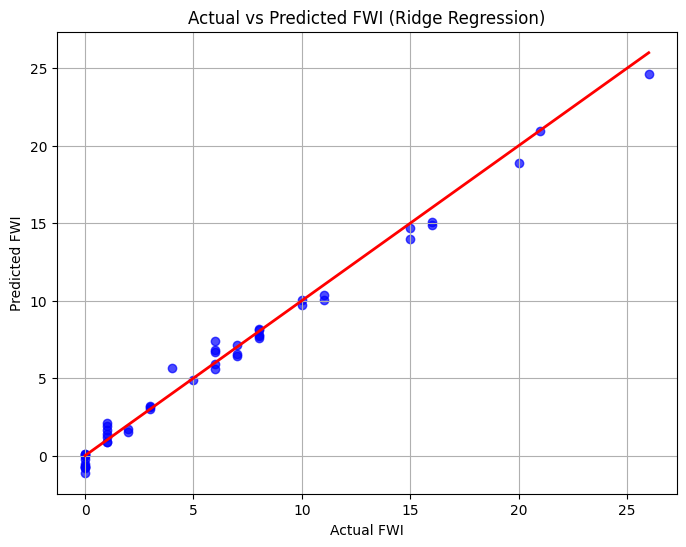

In [ ]:
# Predicted vs Actual Plot (Main Performance Plot)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red',
    linewidth=2
)

plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs Predicted FWI (Ridge Regression)")
plt.grid(True)
plt.show()


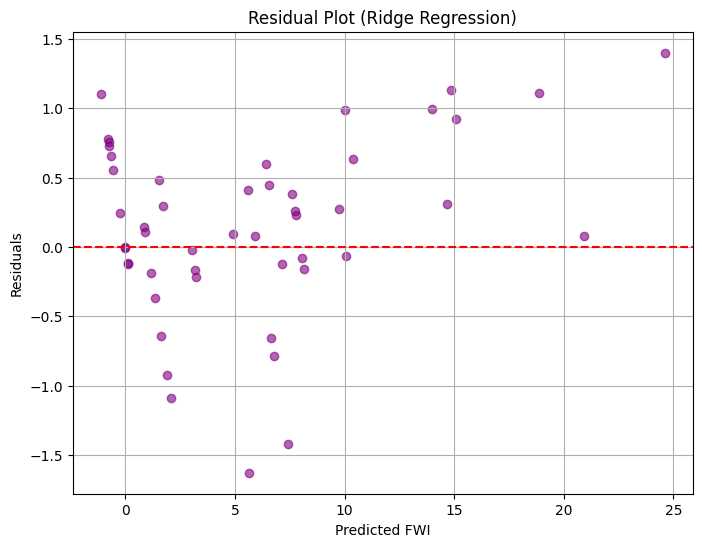

In [ ]:
# Residual Plot (Error Visualization)
residuals = y_test - y_test_pred

plt.figure(figsize=(8,6))
plt.scatter(y_test_pred, residuals, color="purple", alpha=0.6)
plt.axhline(0, color="red", linestyle="--")

plt.xlabel("Predicted FWI")
plt.ylabel("Residuals")
plt.title("Residual Plot (Ridge Regression)")
plt.grid(True)
plt.show()


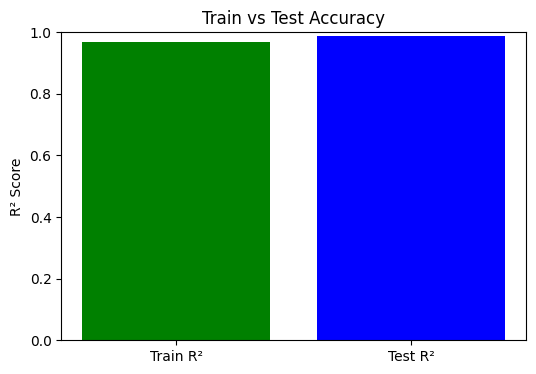

In [ ]:
# rain vs Test Accuracy Plot
plt.figure(figsize=(6,4))
plt.bar(["Train R²","Test R²"], [train_r2, test_r2], color=["green","blue"])
plt.ylim(0,1)
plt.title("Train vs Test Accuracy")
plt.ylabel("R² Score")
plt.show()
